In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# imporitng dataset from Kaggle

df = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")

print(df)

     Customer_ID  Age  Gender Income_Level Marital_Status Education_Level  \
0    37-611-6911   22  Female       Middle        Married      Bachelor's   
1    29-392-9296   49    Male         High        Married     High School   
2    84-649-5117   24  Female       Middle         Single        Master's   
3    48-980-6078   29  Female       Middle         Single        Master's   
4    91-170-9072   33  Female       Middle        Widowed     High School   
..           ...  ...     ...          ...            ...             ...   
995  20-562-2569   44  Female         High       Divorced      Bachelor's   
996  41-366-4205   50  Female         High         Single     High School   
997  77-241-7621   26    Male         High        Married      Bachelor's   
998  53-091-2176   21  Female         High        Widowed      Bachelor's   
999  48-203-9118   21  Female       Middle         Single     High School   

    Occupation    Location     Purchase_Category Purchase_Amount  ...  \
0 

In [82]:
#Cleaning dataset columns and indinitfing column types
# 1. Load the dataset
df = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")

# 2. Clean 'Purchase_Amount'
# We remove the '$' sign and any extra spaces, then convert to numeric
df['Purchase_Amount'] = df['Purchase_Amount'].str.replace('$', '', regex=False).str.strip()
df['Purchase_Amount'] = pd.to_numeric(df['Purchase_Amount'])

# 3. Clean 'Time_of_Purchase'
# Converting this to a datetime object makes timing analysis much easier
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'])

# 4. Save clean copy
df.to_csv("Cleaned_Ecommerce_Data.csv", index=False)

print("Cleaning complete!")
print(df.dtypes) # This will confirm 'Purchase_Amount' is now a float64

#We will be using Cleaned_Ecommerce_Data.csv going forward

Cleaning complete!
Customer_ID                                      object
Age                                               int64
Gender                                           object
Income_Level                                     object
Marital_Status                                   object
Education_Level                                  object
Occupation                                       object
Location                                         object
Purchase_Category                                object
Purchase_Amount                                 float64
Frequency_of_Purchase                             int64
Purchase_Channel                                 object
Brand_Loyalty                                     int64
Product_Rating                                    int64
Time_Spent_on_Product_Research(hours)           float64
Social_Media_Influence                           object
Discount_Sensitivity                             object
Return_Rate                  

In [ ]:
# Preview Analyses:

In [74]:
# Consumers With highest Purchase amounts:

df = pd.read_csv("Cleaned_Ecommerce_Data.csv")

highest_spending = df.nlargest(10, "Purchase_Amount")[["Customer_ID", "Purchase_Amount"]]

print(highest_spending)

     Customer_ID  Purchase_Amount
360  60-470-3563           498.33
707  13-848-5757           498.23
473  15-663-7994           497.80
927  86-257-9581           497.76
847  15-421-1255           497.75
147  72-830-1211           496.11
670  85-467-6564           495.95
882  72-590-6161           495.80
663  69-394-1424           494.97
850  59-261-4453           494.81


In [110]:
# Average Product Rating by Purchaser Age

Rating = (df.groupby('Age')['Product_Rating'].mean())

print(Rating)

Age
18    2.500000
19    3.093750
20    3.263158
21    2.742857
22    3.315789
23    3.212121
24    3.156250
25    3.125000
26    2.823529
27    2.906977
28    3.000000
29    3.027027
30    3.185185
31    2.814815
32    3.233333
33    3.076923
34    3.233333
35    2.833333
36    2.870968
37    3.131579
38    2.909091
39    2.925926
40    3.368421
41    2.700000
42    3.529412
43    2.518519
44    3.034483
45    3.484848
46    3.037037
47    2.888889
48    3.148148
49    2.714286
50    3.147059
Name: Product_Rating, dtype: float64


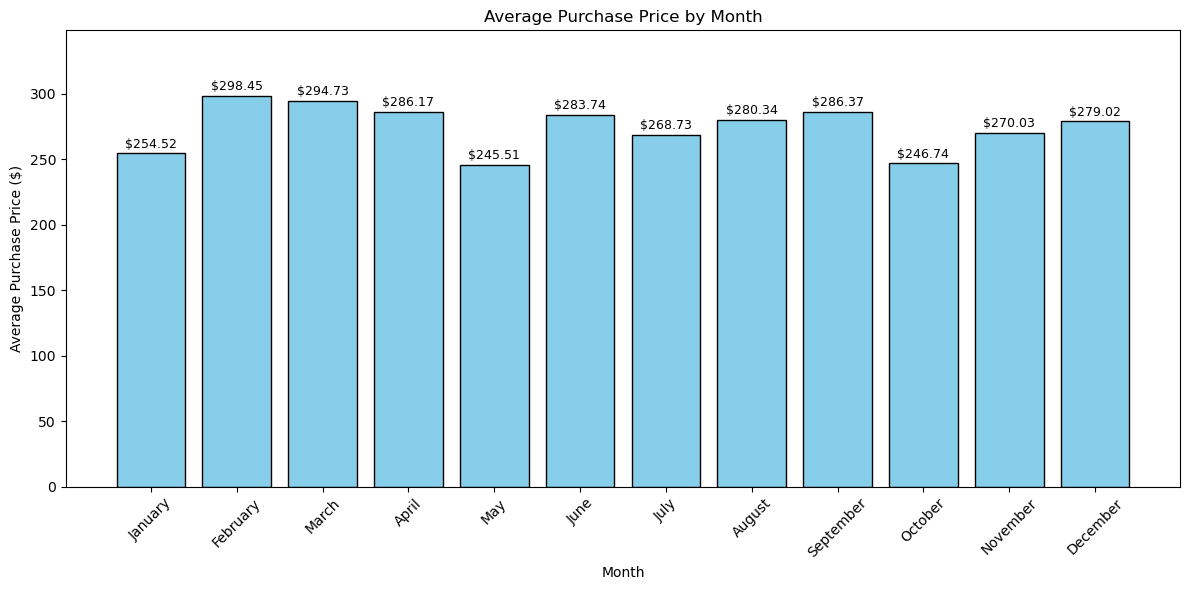

In [120]:
import calendar

# data prep
df = pd.read_csv("Cleaned_Ecommerce_Data.csv")
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'])
df['Month'] = df['Time_of_Purchase'].dt.month
monthly_avg = df.groupby('Month')['Purchase_Amount'].mean()
month_names = [calendar.month_name[x] for x in monthly_avg.index]
plt.figure(figsize=(12, 6))

# CRITICAL STEP: Assign the plot to a variable named 'bars'
bars = plt.bar(month_names, monthly_avg.values, color='skyblue', edgecolor='black')

# For The Loop to Add Labels on graph
for bar in bars:
    yval = bar.get_height() # Get the height (the value)
    
    # plt.text(x_position, y_position, text_string, alignment...)
    plt.text(
        bar.get_x() + bar.get_width()/2,  # X: Center of the bar
        yval + 2,                         # Y: Just slightly above the bar
        f'${yval:.2f}',                   # Text: Formatted as currency
        ha='center',                      # Horizontal Align: Center
        va='bottom',                      # Vertical Align: Bottom
        fontsize=9
    )

# Final Formatting
plt.title('Average Purchase Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Purchase Price ($)')
plt.xticks(rotation=45)
plt.ylim(0, max(monthly_avg.values) + 50) # Add some headroom for the text
plt.tight_layout()
plt.savefig('monthly_avg_purchase_price_labeled.png')
plt.show()

In [ ]:
# Main Analyses:

In [ ]:
# Analysis I: Consumer Purchase Intent measured by Brand Loyalty

In [ ]:
# Analysis II: Purchasing category measured by Location, Segmenented by Consumer Loyalty

In [ ]:
# Analysis III: Top purchasing catagories across High Income Women measured by Education

In [44]:
# Analysis IV: Correlation of Income Sorted Age Ranges and Resulting Social Media Influence by Age Range

In [ ]:
# Analysis V: Corrleation of purchase intend by Time to Decision, segemented by age, income, and education